##### 2. XGBoost 모델링
사용 데이터 : 효림 님이 전처리 해주신 문장 데이터 사용

In [17]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# 라이브러리 업그레이드 후 실행
# from xgboost import XGBClassifier
# from sklearn.metrics import accuracy_score, classification_report
from sklearn import set_config

# 학습 이력을 저장하기 위해서.
import pickle

# 시각화를 위해서.
from xgboost import plot_importance, plot_tree
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

In [18]:
df = pd.read_excel('C:/labs_python/src_mj/datasets/full_data.xlsx')

In [19]:
# 1. 리스트 데이터를 문자열로 변환
df['main_tokens_str'] = df['Sentence_cleaned'].apply(lambda x: "".join(x))

In [20]:
# 2. TF-IDF 벡터화
vectorizer = TfidfVectorizer(max_features=5000)  # 상위 5000개의 단어만 사용
X = vectorizer.fit_transform(df['main_tokens_str'])  # TF-IDF 행렬 생성
y = df['Emotion']  # 감정 레이블

In [21]:
# 3. 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# y 데이터 인코딩
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

y_train_e = label_encoder.fit_transform(y_train)
y_test_e = label_encoder.transform(y_test)



In [22]:
# 4. XGBoost 모델 학습

# 학습 데이터 설정
eval_set = [(X_train, y_train_e), (X_test, y_test_e)]  # 학습 및 검증 데이터 설정
# scikit-learn 출력 설정 변경
set_config(display="text")

# 모델 학습
model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
model.fit(X_train, y_train_e, eval_set=eval_set, verbose=True)

[0]	validation_0-mlogloss:1.92362	validation_1-mlogloss:1.92553
[1]	validation_0-mlogloss:1.90635	validation_1-mlogloss:1.90963
[2]	validation_0-mlogloss:1.89209	validation_1-mlogloss:1.89694
[3]	validation_0-mlogloss:1.87999	validation_1-mlogloss:1.88585
[4]	validation_0-mlogloss:1.86940	validation_1-mlogloss:1.87662
[5]	validation_0-mlogloss:1.86000	validation_1-mlogloss:1.86791
[6]	validation_0-mlogloss:1.85154	validation_1-mlogloss:1.86037
[7]	validation_0-mlogloss:1.84386	validation_1-mlogloss:1.85346
[8]	validation_0-mlogloss:1.83672	validation_1-mlogloss:1.84764
[9]	validation_0-mlogloss:1.83023	validation_1-mlogloss:1.84179
[10]	validation_0-mlogloss:1.82415	validation_1-mlogloss:1.83701
[11]	validation_0-mlogloss:1.81851	validation_1-mlogloss:1.83254
[12]	validation_0-mlogloss:1.81317	validation_1-mlogloss:1.82796
[13]	validation_0-mlogloss:1.80815	validation_1-mlogloss:1.82334
[14]	validation_0-mlogloss:1.80342	validation_1-mlogloss:1.81896
[15]	validation_0-mlogloss:1.79885	

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [23]:
# 예측 수행
y_pred_encoded = model.predict(X_test)

In [24]:
# 숫자 레이블을 다시 문자열로 변환
y_pred = label_encoder.inverse_transform(y_pred_encoded)

In [25]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.3473796506200827
Classification Report:
              precision    recall  f1-score   support

          공포       0.57      0.31      0.40      1075
          놀람       0.20      0.70      0.32      1124
          분노       0.41      0.29      0.34      1085
          슬픔       0.57      0.32      0.41       994
          중립       0.24      0.10      0.14       925
          행복       0.74      0.50      0.60      1190
          혐오       0.28      0.15      0.20      1106

    accuracy                           0.35      7499
   macro avg       0.43      0.34      0.34      7499
weighted avg       0.44      0.35      0.35      7499



In [26]:
# 학습 이력 추출
hist = model.evals_result()

hist

{'validation_0': OrderedDict([('mlogloss',
               [1.923621653429487,
                1.9063512596692178,
                1.8920877959891584,
                1.8799924531605348,
                1.8693975104373939,
                1.8599956105541917,
                1.8515408229223786,
                1.843855564312888,
                1.836717653129474,
                1.8302259523822062,
                1.824146811368764,
                1.8185120573976195,
                1.8131653723766017,
                1.8081502268653766,
                1.8034182730446777,
                1.7988490722024018,
                1.79456445879689,
                1.79037982049257,
                1.7864485257058207,
                1.7826000202504928,
                1.7788764200363185,
                1.775463621507865,
                1.7720108282925746,
                1.7687435165825118,
                1.7656183547160091,
                1.7624095069401302,
                1.759432540040

##### 3. 시각화

In [27]:
# 특성 이름 확인
feature_names = vectorizer.get_feature_names_out()

# 상위 10개 중요 특성 이름 출력
importance = model.get_booster().get_score(importance_type='weight')  # 중요도 가져오기
sorted_importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)  # 중요도 순 정렬

for f, score in sorted_importance[:10]:
    feature_index = int(f[1:])  # "f403"에서 숫자만 추출
    print(f"Feature: {feature_names[feature_index]}, Importance Score: {score}")



Feature: 국민, Importance Score: 350.0
Feature: 사람, Importance Score: 317.0
Feature: 나라, Importance Score: 263.0
Feature: 여자, Importance Score: 210.0
Feature: 걱정, Importance Score: 188.0
Feature: 고민, Importance Score: 182.0
Feature: 친구, Importance Score: 181.0
Feature: 대단, Importance Score: 179.0
Feature: 박근혜, Importance Score: 178.0
Feature: 남자, Importance Score: 152.0


<Figure size 1000x800 with 0 Axes>

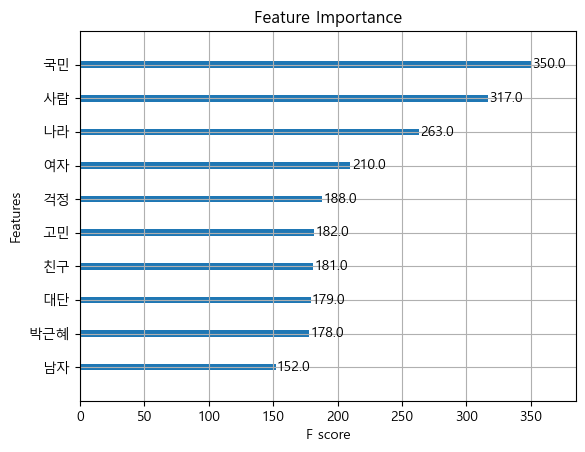

In [28]:
# 특성 이름 매핑

feature_names_list = feature_names.tolist()
model.get_booster().feature_names = feature_names_list

# 특성 중요도 시각화
plt.figure(figsize=(10, 8))
plot_importance(model, max_num_features=10)  # 중요도 상위 10개만 표시
plt.title('Feature Importance')
plt.show()

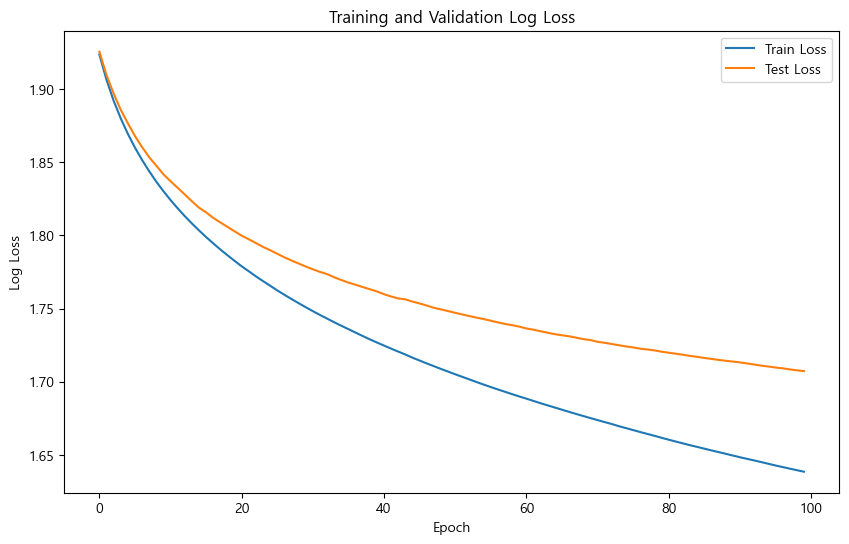

In [29]:
# 학습 이력에서 손실값 추출
history = model.evals_result()
epochs = len(history['validation_0']['mlogloss'])
x_axis = range(0, epochs)

# 학습 및 검증 손실 그래프
plt.figure(figsize=(10, 6))
plt.plot(x_axis, history['validation_0']['mlogloss'], label='Train Loss')
plt.plot(x_axis, history['validation_1']['mlogloss'], label='Test Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Log Loss')
plt.title('Training and Validation Log Loss')
plt.show()


In [34]:
#저장
model.save_model('./2ndProject/LMJ/model_0115_XGBoost.json')

In [31]:
# from xgboost import XGBClassifier

# # 저장된 모델 로드
# loaded_model = XGBClassifier()
# loaded_model.load_model('model_0115_XGBoost.model')

In [32]:
# 모델과 학습 이력 저장
# with open('model_and_history.pkl', 'wb') as f:
#     pickle.dump({'model': model, 'history': history}, f)

# print("모델과 학습 이력이 저장되었습니다.")

# # 저장된 모델과 학습 이력 로드
# with open('model_and_history.pkl', 'rb') as f:
#     data = pickle.load(f)

# loaded_model = data['model']  # 로드한 모델
# loaded_history = data['history']  # 로드한 학습 이력

# print("모델과 학습 이력이 로드되었습니다.")

모델과 학습 이력이 저장되었습니다.
